# ANN, excluding Leu-epitopes

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

2025-01-15 08:38:10.185611: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-15 08:38:10.193362: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736948290.202182   98390 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736948290.204744   98390 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-15 08:38:10.214020: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## dataset

In [2]:
infile = '/home/yuan/results/epitope/epi_top_features.txt'
df = pd.read_csv(infile, sep='\t', header=0, index_col=None)
# balance the number of epitopes and non-epitopes
# shuffle rows
df = df.sample(frac=1)
df.head()

,seq,label,mean_hydro_ph7,mean_hydro,mean_polar,mean_polar_stab,mean_VDWV,median_hydro_ph7,median_hydro,median_polar,...,has_C,has_I,has_L,has_K,has_F,has_P,has_S,has_T,has_Y,has_V
1711216,EAICSLCTS,0,34.111111,0.791111,7.611111,0.117444,2.604444,41.0,0.610,8.1,...,1,1,1,0,0,0,1,1,0,0
1967245,LSPLTVKPQP,1,10.700000,1.148000,7.930000,0.147400,3.208000,-7.5,1.425,8.0,...,0,0,1,1,0,1,1,1,0,1
2524069,SAEVAVKMFDAY,1,33.166667,0.973333,8.250000,0.147000,3.226667,41.0,0.880,8.1,...,0,0,0,1,1,0,1,0,1,1
1953573,DDPSTIEKLAKNKQKPI,1,-1.117647,0.978235,9.576471,0.152176,3.409412,-23.0,1.150,10.5,...,0,1,1,1,0,1,1,1,0,0
848679,KASPLRLSF,1,26.888889,1.054444,7.922222,0.163667,3.523333,-5.0,1.150,8.1,...,0,0,1,1,1,1,1,0,0,0


In [3]:
%load_ext autoreload
%autoreload 2

from seq.my_ann import MyAnn

## filter I: without Leu

In [4]:
# keep epitopes without Leu
feature = 'has_L'
print('entire data:', df.shape)
print('epitopes without Leu:', df[(df[feature]==0) & (df['label']==1)].shape)
print('epitopes having Leu:', df[(df[feature]==1) & (df['label']==1)].shape)
sub_df = df[~((df[feature]==1) & (df['label']==1))]
print('filtered data:', sub_df.shape)

entire data: (3458238, 50)
epitopes without Leu: (550617, 50)
epitopes having Leu: (1314625, 50)
filtered data: (2143613, 50)


In [5]:
# prepare 
c = MyAnn()
c.get_xy(sub_df)

X: (2143613, 48) float16
y: (2143613,) float16
labels: Counter({np.float16(0.0): 1592996, np.float16(1.0): 550617})
train data: (1200423, 48) (1200423,)
validate data: (514467, 48) (514467,)
test data (428723, 48) (428723,)


In [6]:
# train model
c.declare_model()
c.train(epochs=10)

I0000 00:00:1736948308.919712   98390 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9313 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        25,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 96)             │        49,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,433 (290.75 KB)

 Trainable params: 74,433 (290.75 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10


I0000 00:00:1736948310.287118   98564 service.cc:148] XLA service 0x77ba74004590 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736948310.287143   98564 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-01-15 08:38:30.310055: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1736948310.393083   98564 cuda_dnn.cc:529] Loaded cuDNN version 90300


  167/37514 ━━━━━━━━━━━━━━━━━━━━ 33s 909us/step - accuracy: 0.7771 - auc: 0.8172 - loss: 0.4291 - mse: 0.1443 - precision: 0.5796 - recall: 0.4183  

I0000 00:00:1736948310.953222   98564 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


37514/37514 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - accuracy: 0.8196 - auc: 0.8944 - loss: 0.3338 - mse: 0.1150 - precision: 0.6513 - recall: 0.6461 - val_accuracy: 0.8364 - val_auc: 0.9096 - val_loss: 0.3141 - val_mse: 0.1069 - val_precision: 0.6792 - val_recall: 0.6846
Epoch 2/10
37514/37514 ━━━━━━━━━━━━━━━━━━━━ 75s 2ms/step - accuracy: 0.8352 - auc: 0.9078 - loss: 0.3172 - mse: 0.1081 - precision: 0.6719 - recall: 0.6982 - val_accuracy: 0.8445 - val_auc: 0.9165 - val_loss: 0.3047 - val_mse: 0.1030 - val_precision: 0.6837 - val_recall: 0.7310
Epoch 3/10
37514/37514 ━━━━━━━━━━━━━━━━━━━━ 64s 2ms/step - accuracy: 0.8419 - auc: 0.9133 - loss: 0.3105 - mse: 0.1050 - precision: 0.6783 - recall: 0.7330 - val_accuracy: 0.8473 - val_auc: 0.9193 - val_loss: 0.3002 - val_mse: 0.1012 - val_precision: 0.6785 - val_recall: 0.7671
Epoch 4/10
37514/37514 ━━━━━━━━━━━━━━━━━━━━ 73s 2ms/step - accuracy: 0.8444 - auc: 0.9156 - loss: 0.3072 - mse: 0.1037 - precision: 0.6821 - recall: 0.7396 - val_accuracy: 0.

,accuracy,auc,loss,mse,precision,recall,val_accuracy,val_auc,val_loss,val_mse,val_precision,val_recall
0,0.825319,0.899605,0.327503,0.112477,0.661557,0.656105,0.836402,0.909605,0.314144,0.106874,0.679162,0.684636
1,0.836945,0.909376,0.315568,0.107283,0.672651,0.712345,0.844486,0.916517,0.304732,0.103041,0.683661,0.731039
2,0.842723,0.913989,0.309381,0.104571,0.679299,0.735292,0.847261,0.919342,0.300195,0.101232,0.678504,0.767082
3,0.845099,0.915926,0.306641,0.103414,0.683709,0.739498,0.849856,0.921131,0.299104,0.100609,0.684981,0.766050
4,0.845966,0.916813,0.305354,0.102876,0.684681,0.742908,0.850989,0.921788,0.296078,0.099521,0.697521,0.738363
5,0.846880,0.917574,0.304320,0.102392,0.686985,0.742752,0.851522,0.922494,0.296895,0.099853,0.687725,0.769792
6,0.847554,0.918137,0.303523,0.102058,0.687735,0.745393,0.851895,0.922899,0.296241,0.099518,0.687544,0.773002
7,0.848030,0.918635,0.302883,0.101764,0.688458,0.746703,0.852669,0.923284,0.295027,0.099023,0.689350,0.773139
8,0.848470,0.918910,0.302524,0.101610,0.689057,0.748103,0.853485,0.923615,0.294225,0.098689,0.697176,0.756518
9,0.848579,0.919028,0.302316,0.101533,0.689114,0.748712,0.853479,0.923811,0.294188,0.098655,0.702384,0.742515


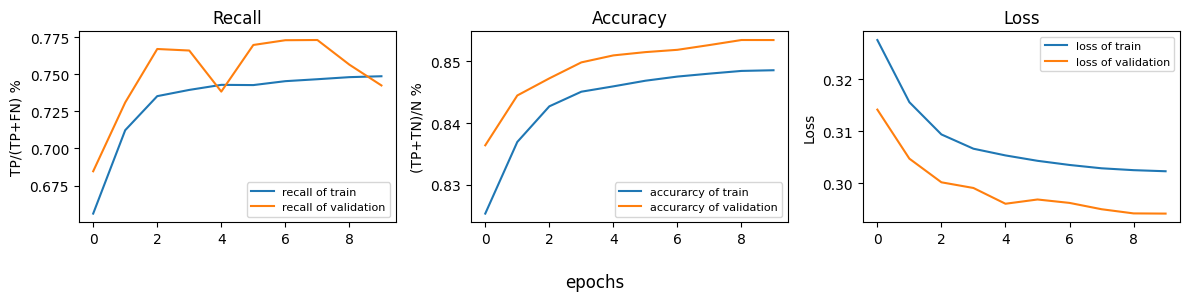

In [7]:
# evaluate model
c.plot_acc_recall()

13398/13398 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.8533 - auc: 0.9241 - loss: 0.2952 - mse: 0.0989 - precision: 0.7062 - recall: 0.7399  
{'accuracy': 0.853947639465332, 'auc': 0.9242497682571411, 'loss': 0.2942133843898773, 'mse': 0.09859543293714523, 'precision': 0.7056072950363159, 'recall': 0.7416669726371765}
13398/13398 ━━━━━━━━━━━━━━━━━━━━ 5s 373us/step
[[0.        ]
 [0.660109  ]
 [0.66354704]]


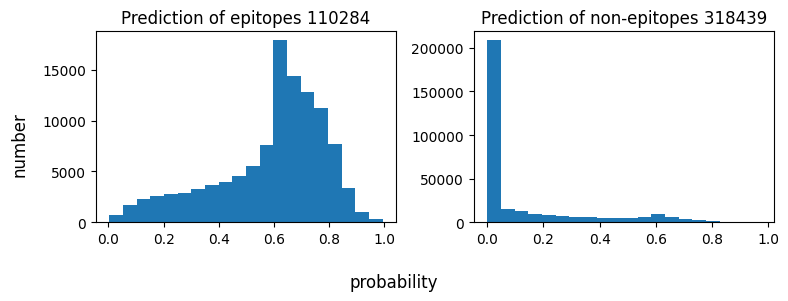

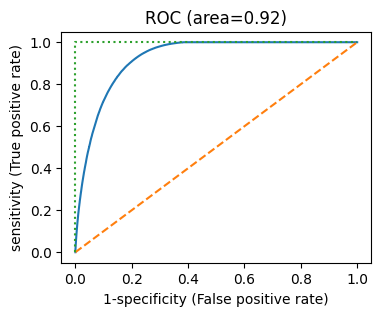

In [8]:
# evaluate model using test data
c.test()
c.plot_prob()
c.plot_roc()

In [9]:
# save entire model
c.save_model('../models/epitopes_ann_notLeu.keras')

<Sequential name=sequential, built=True>

## filter II: having Leu

In [10]:
# keep epitopes contain Leu
feature = 'has_L'
print('entire data:', df.shape)
print('epitopes without Leu:', df[(df[feature]==0) & (df['label']==1)].shape)
print('epitopes having Leu:', df[(df[feature]==1) & (df['label']==1)].shape)
sub_df = df[~((df[feature]==0) & (df['label']==1))]
print('filtered data:', sub_df.shape)

entire data: (3458238, 50)
epitopes without Leu: (550617, 50)
epitopes having Leu: (1314625, 50)
filtered data: (2907621, 50)


In [11]:
# prepare 
c = MyAnn()
c.get_xy(sub_df)

X: (2907621, 48) float16
y: (2907621,) float16
labels: Counter({np.float16(0.0): 1592996, np.float16(1.0): 1314625})
train data: (1628267, 48) (1628267,)
validate data: (697829, 48) (697829,)
test data (581525, 48) (581525,)


In [12]:
# train model
c.declare_model()
c.train(epochs=10)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │        25,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 96)             │        49,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,433 (290.75 KB)

 Trainable params: 74,433 (290.75 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
50884/50884 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - accuracy: 0.7312 - auc: 0.8154 - loss: 0.4898 - mse: 0.1698 - precision: 0.6651 - recall: 0.8137 - val_accuracy: 0.7467 - val_auc: 0.8321 - val_loss: 0.4733 - val_mse: 0.1628 - val_precision: 0.6932 - val_recall: 0.7910
Epoch 2/10
50884/50884 ━━━━━━━━━━━━━━━━━━━━ 97s 2ms/step - accuracy: 0.7460 - auc: 0.8316 - loss: 0.4750 - mse: 0.1633 - precision: 0.6792 - recall: 0.8288 - val_accuracy: 0.7531 - val_auc: 0.8386 - val_loss: 0.4666 - val_mse: 0.1599 - val_precision: 0.6929 - val_recall: 0.8172
Epoch 3/10
50884/50884 ━━━━━━━━━━━━━━━━━━━━ 95s 2ms/step - accuracy: 0.7495 - auc: 0.8352 - loss: 0.4717 - mse: 0.1618 - precision: 0.6841 - recall: 0.8265 - val_accuracy: 0.7552 - val_auc: 0.8410 - val_loss: 0.4646 - val_mse: 0.1590 - val_precision: 0.7005 - val_recall: 0.8028
Epoch 4/10
50884/50884 ━━━━━━━━━━━━━━━━━━━━ 94s 2ms/step - accuracy: 0.7514 - auc: 0.8371 - loss: 0.4699 - mse: 0.1610 - precision: 0.6872 - recall: 0.8255 - 

,accuracy,auc,loss,mse,precision,recall,val_accuracy,val_auc,val_loss,val_mse,val_precision,val_recall
0,0.738421,0.823260,0.482658,0.166729,0.671066,0.824891,0.746683,0.832064,0.473283,0.162849,0.693153,0.791019
1,0.747355,0.832958,0.473664,0.162729,0.680760,0.829193,0.753074,0.838563,0.466609,0.159948,0.692872,0.817190
2,0.749951,0.835473,0.471412,0.161682,0.684755,0.826681,0.755171,0.840951,0.464558,0.158990,0.700501,0.802836
3,0.751558,0.836875,0.469996,0.161026,0.687093,0.825674,0.754894,0.842472,0.465286,0.159279,0.679238,0.869657
4,0.752185,0.837689,0.469076,0.160636,0.687818,0.825898,0.756761,0.842564,0.462990,0.158285,0.699099,0.813034
5,0.752870,0.838338,0.468535,0.160360,0.688897,0.825239,0.755957,0.843012,0.462607,0.158164,0.684673,0.855170
6,0.753618,0.839031,0.467842,0.160052,0.690364,0.823626,0.757671,0.843795,0.461940,0.157778,0.696841,0.823260
7,0.754296,0.839550,0.467282,0.159782,0.691081,0.824103,0.758283,0.843935,0.461511,0.157622,0.701457,0.812076
8,0.754266,0.839830,0.467052,0.159688,0.691287,0.823343,0.758432,0.844699,0.460613,0.157269,0.708287,0.793653
9,0.754979,0.840277,0.466567,0.159492,0.692010,0.823944,0.759058,0.845271,0.460154,0.156915,0.704708,0.805828


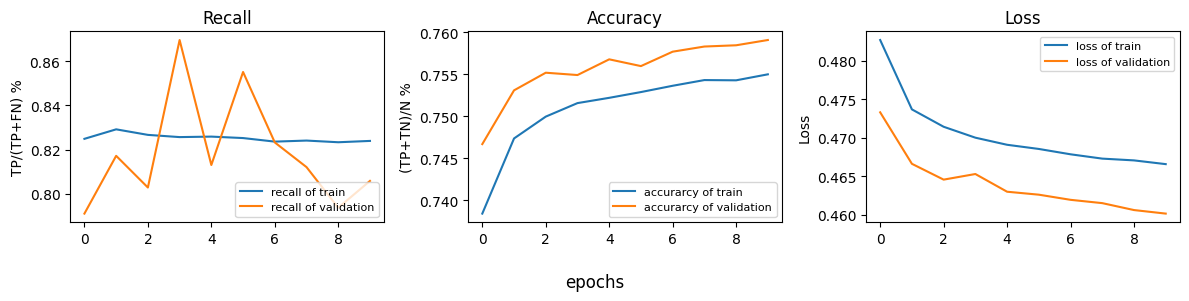

In [13]:
# evaluate model
c.plot_acc_recall()

18173/18173 ━━━━━━━━━━━━━━━━━━━━ 18s 997us/step - accuracy: 0.7597 - auc: 0.8446 - loss: 0.4612 - mse: 0.1572 - precision: 0.7058 - recall: 0.8072
{'accuracy': 0.7594308257102966, 'auc': 0.8448349833488464, 'loss': 0.46083566546440125, 'mse': 0.1571384221315384, 'precision': 0.7051033973693848, 'recall': 0.8060675859451294}
18173/18173 ━━━━━━━━━━━━━━━━━━━━ 7s 385us/step
[[0.74467975]
 [0.6235237 ]
 [0.        ]]


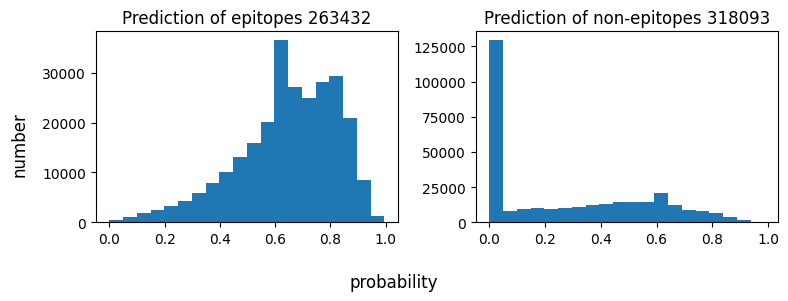

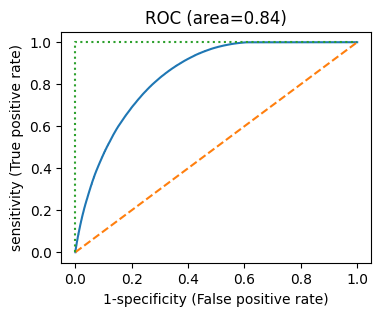

In [14]:
# evaluate model using test data
c.test()
c.plot_prob()
c.plot_roc()

In [15]:
# save entire model
c.save_model('../models/epitopes_ann_hasLeu.keras')

<Sequential name=sequential_1, built=True>